In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_ml = "/content/drive/My Drive/Covid/Rock/ML"
path_pa = "/content/drive/My Drive/Covid/Rock/PA"

# Used to set the number of decimal places for common features
decimal_round = 4

In [ ]:
# Read feature set from Rock Spectroscopy

import os
import numpy as np
import pandas as pd

fname = []
file = os.path.join(path_ml,'Andesite73302_200AVG.txt')
with open(file) as firstFile:
  rock_features = []
  for line in firstFile:
    columns = line.split() # split line into parts
    if len(columns) > 1:   # if at least 2 parts/columns
       rock_features.append(round(float(columns[0]), decimal_round))
df = pd.DataFrame(columns=rock_features)


In [ ]:
# Read data from rock spectroscopes
from PIL import Image
import csv
lst = []
dfp = pd.DataFrame() 
for dirpath, dirs, files in os.walk(path_ml):
    for filename in files:
        fname = os.path.join(dirpath,filename)
        data = []      
        with open(fname) as inf:         
          dfp = dfp.append(pd.Series(np.loadtxt(inf)[:, 1]), ignore_index=True)

for dirpath, dirs, files in os.walk(path_pa):
    for filename in files:
        fname = os.path.join(dirpath,filename)
        data = []      
        with open(fname) as inf:         
          dfp = dfp.append(pd.Series(np.loadtxt(inf)[:, 1]), ignore_index=True)            

dfp.columns = rock_features
dfp.shape
dfp.head(70)

,198.066,198.122,198.177,198.233,198.288,198.344,198.399,198.455,198.511,198.566,198.622,198.677,198.733,198.788,198.844,198.899,198.955,199.010,199.066,199.121,199.177,199.232,199.288,199.343,199.399,199.454,199.510,199.565,199.621,199.676,199.732,199.787,199.842,199.898,199.953,200.009,200.064,200.120,200.175,200.230,...,967.438,967.507,967.577,967.647,967.716,967.786,967.855,967.925,967.994,968.064,968.133,968.203,968.272,968.342,968.411,968.480,968.550,968.619,968.689,968.758,968.827,968.897,968.966,969.035,969.105,969.174,969.243,969.312,969.382,969.451,969.520,969.589,969.658,969.727,969.797,969.866,969.935,970.004,970.073,970.142
0,-8.337,-7.891,-7.746,-7.965,-8.041,-7.819,-7.649,-8.002,-8.117,-7.886,-7.705,-7.808,-7.671,-7.766,-7.868,-7.861,-7.657,-7.553,-7.632,-7.733,-7.768,-7.793,-7.842,-7.599,-7.455,-7.302,-7.313,-7.087,-6.977,-7.154,-7.493,-7.274,-7.234,-7.120,-7.170,-7.274,-7.144,-7.289,-7.153,-7.098,...,-7.858,-8.212,-8.094,-8.046,-8.277,-8.156,-8.375,-8.442,-8.336,-8.516,-8.544,-8.375,-8.067,-8.460,-8.317,-8.168,-8.023,-8.512,-8.419,-8.265,-8.381,-8.632,-8.539,-8.519,-8.355,-8.583,-8.359,-8.474,-8.407,-8.449,-8.648,-8.764,-8.562,-8.603,-8.548,-8.485,-8.657,-8.627,-8.568,-8.466
1,0.161,0.435,0.240,0.122,0.214,0.516,0.680,0.742,0.896,0.377,0.353,0.423,0.727,0.692,0.645,0.611,0.405,0.532,0.903,0.437,0.273,0.304,0.241,0.748,0.997,1.167,1.119,1.031,1.145,1.083,1.066,1.194,1.130,1.195,1.092,0.970,1.012,1.343,1.397,1.365,...,0.955,0.866,0.999,0.864,0.684,0.733,0.843,0.948,0.988,1.003,1.005,1.011,1.023,0.846,0.667,0.823,0.801,0.841,0.514,0.653,0.721,0.427,0.392,0.425,0.572,0.622,0.475,0.563,0.457,0.625,0.613,0.462,0.481,0.570,0.518,0.445,0.334,0.501,0.286,0.189
2,-1.104,-1.103,-1.265,-1.117,-1.027,-1.064,-1.041,-1.064,-0.945,-0.762,-0.933,-1.173,-0.886,-0.988,-0.901,-1.119,-1.129,-1.032,-0.992,-0.908,-0.773,-0.952,-1.010,-0.393,-0.343,-0.366,-0.275,-0.433,-0.451,-0.478,-0.546,-0.642,-0.697,-0.621,-0.562,-0.398,-0.398,0.032,-0.326,-0.453,...,-0.144,-0.507,-0.451,-0.634,-0.566,-0.442,-0.615,-0.718,-0.666,-0.636,-0.570,-0.773,-0.958,-0.780,-0.607,-0.839,-0.878,-0.865,-0.764,-0.781,-1.009,-0.983,-0.619,-0.469,-0.572,-0.843,-1.012,-0.953,-0.754,-0.921,-0.723,-0.679,-0.905,-1.046,-1.002,-1.018,-0.867,-0.931,-1.095,-0.954
3,-0.994,-0.923,-0.855,-0.707,-0.707,-0.699,-0.801,-0.829,-0.895,-1.082,-1.083,-0.598,-0.646,-1.063,-1.076,-1.124,-0.824,-0.917,-0.957,-0.803,-0.688,-0.762,-1.020,-0.608,-0.423,-0.446,-0.305,-0.283,-0.301,-0.553,-0.331,-0.187,-0.277,-0.276,-0.372,-0.333,-0.483,-0.118,-0.131,-0.418,...,0.196,0.168,0.054,-0.049,-0.246,-0.147,-0.020,-0.003,-0.106,-0.236,-0.300,-0.233,-0.258,-0.190,-0.302,-0.559,-0.388,-0.285,-0.279,-0.451,-0.579,-0.678,-0.394,-0.479,-0.552,-0.528,-0.552,-0.728,-0.549,-0.421,-0.273,-0.399,-0.515,-0.636,-0.577,-0.588,-0.687,-0.436,-0.695,-0.494
4,-0.419,-0.310,-0.170,0.032,0.269,0.406,0.535,0.337,0.036,-0.123,0.238,0.373,0.417,0.512,0.535,0.286,0.355,0.317,0.483,0.342,0.133,0.359,0.506,0.788,1.567,1.742,1.999,1.891,1.745,1.523,1.661,1.819,1.960,1.625,1.717,1.860,1.782,1.723,1.682,1.710,...,0.920,0.831,0.649,0.704,0.904,1.013,0.998,1.013,0.948,0.998,0.735,0.766,0.613,0.606,0.822,0.733,0.686,0.566,0.264,0.268,0.331,0.412,0.287,0.620,0.442,0.367,0.390,0.533,0.362,0.030,0.038,0.182,0.181,0.080,0.093,0.185,0.204,0.346,0.206,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.084,-0.095,-0.255,-0.193,0.139,0.536,0.155,-0.013,0.091,-0.013,-0.007,-0.147,0.167,0.252,0.410,0.416,0.385,0.232,0.548,0.012,-0.017,0.369,0.446,0.763,1.507,1.747,1.604,1.521,1.640,1.708,1.601,1.624,1.535,1.740,1.697,1.825,1.807,1.708,1.612,1.555,...,1.545,1.451,1.324,1.369,1.184,1.148,1.478,1.358,1.553,1.428,1.145,0.976,0.968,0.936,0.967,1.168,0.911

In [ ]:
#Read feature set for covid data of patients

import os
import numpy as np
import pandas as pd
from collections import defaultdict

columns = defaultdict(list)

path_nnt = "/content/drive/My Drive/Covid/patients/covid/NNT"
path_nt = "/content/drive/My Drive/Covid/patients/covid/NT"
path_p = "/content/drive/My Drive/Covid/patients/covid/P"

fname = []
file = os.path.join(path_nnt,'17_Sel_Mean.csv')
df = pd.DataFrame()
cols = pd.read_csv(file, header=None, usecols=[0]).T
cols.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24512,24513,24514,24515,24516,24517,24518,24519,24520,24521,24522,24523,24524,24525,24526,24527,24528,24529,24530,24531,24532,24533,24534,24535,24536,24537,24538,24539,24540,24541,24542,24543,24544,24545,24546,24547,24548,24549,24550,24551
0,199.383575,199.383575,199.396896,199.410202,199.423523,199.436829,199.45015,199.46347,199.476791,199.490097,199.503418,199.516739,199.53006,199.543381,199.556702,199.570023,199.583344,199.596664,199.609985,199.623306,199.636627,199.649948,199.663269,199.67659,199.689926,199.703247,199.716568,199.729904,199.743225,199.756546,199.769882,199.783203,199.796524,199.80986,199.823181,199.836517,199.849854,199.863174,199.876511,199.889832,...,892.376526,892.429443,892.4823,892.535217,892.588074,892.640991,892.693909,892.746765,892.799683,892.8526,892.905518,892.958435,893.011353,893.06427,893.117187,893.170105,893.223022,893.27594,893.328857,893.381836,893.434753,893.487671,893.540649,893.593567,893.646545,893.699463,893.752441,893.80542,893.858337,893.911316,893.964294,894.017273,894.070251,894.123169,894.176147,894.229126,894.282104,894.335144,894.388123,894.441101


In [ ]:
import csv
import glob


path_nnt = "/content/drive/My Drive/Covid/patients/covid/NNT"
path_nt = "/content/drive/My Drive/Covid/patients/covid/NT"
path_p = "/content/drive/My Drive/Covid/patients/covid/P"

lst = []

filenames1 = glob.glob(path_nnt + "/*.csv")
filenames2 = glob.glob(path_nt + "/*.csv")
filenames3 = glob.glob(path_p + "/*.csv")


dfs = []
data_label = []
for filename in filenames1:
    frame = pd.read_csv(filename, header=None, usecols=[1]).T
    dfs.append(frame)
    data_label.append('Negative')

# Concatenate all data into one DataFrame
df_covid = pd.concat(dfs, ignore_index=True)

for filename in filenames2:
    frame = pd.read_csv(filename, header=None, usecols=[1]).T
    dfs.append(frame)
    data_label.append('Negative')

# Concatenate all data into one DataFrame
df_covid = pd.concat(dfs, ignore_index=True)

for filename in filenames3:
    frame = pd.read_csv(filename, header=None, usecols=[1]).T
    dfs.append(frame)
    data_label.append('Positive')

# Concatenate all frames from files into one DataFrame
df_covid = pd.concat(dfs, ignore_index=True)

# column names
covid_features = np.round(cols.values.flatten(),decimal_round)
df_covid.columns = covid_features


# Adding the class labels to the dataset
#df_covid['class_label'] = data_label

## intersected features
value = np.intersect1d(covid_features, rock_features)
print(value)
print(len(value))

df_covid.shape
#df_covid.value_counts(df_covid.class_label)
df_covid.head(5)


[200.784 203.492 207.508 213.787 220.869 226.49  231.639 233.276 248.632
 249.248 259.165 276.58  285.893 292.109 293.567 295.193 299.85  309.584
 311.692 312.051 338.823 352.07  364.361 367.602 369.032 380.056 389.071
 389.994 437.555 447.672 464.698 465.01  469.658 563.259 579.287 584.36
 624.89  657.619 679.844 683.52  718.757 748.936 771.246 785.97  817.804]
45


,199.3836,199.3836,199.3969,199.4102,199.4235,199.4368,199.4502,199.4635,199.4768,199.4901,199.5034,199.5167,199.5301,199.5434,199.5567,199.5700,199.5833,199.5967,199.6100,199.6233,199.6366,199.6499,199.6633,199.6766,199.6899,199.7032,199.7166,199.7299,199.7432,199.7565,199.7699,199.7832,199.7965,199.8099,199.8232,199.8365,199.8499,199.8632,199.8765,199.8898,...,892.3765,892.4294,892.4823,892.5352,892.5881,892.6410,892.6939,892.7468,892.7997,892.8526,892.9055,892.9584,893.0114,893.0643,893.1172,893.1701,893.2230,893.2759,893.3289,893.3818,893.4348,893.4877,893.5406,893.5936,893.6465,893.6995,893.7524,893.8054,893.8583,893.9113,893.9643,894.0173,894.0703,894.1232,894.1761,894.2291,894.2821,894.3351,894.3881,894.4411
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,483.662787,476.910714,453.212906,456.052689,441.438996,481.654421,476.272731,492.314996,473.168515,464.634412,442.993309,441.084325,435.791937,453.568387,433.774589,422.348348,438.141095,434.404507,429.103516,446.162612,432.881353,429.921458,423.072559,420.579250,432.666950,422.744376,415.316244,404.409967,418.994125,412.941858,403.977802,402.132270,420.450691,433.163994,441.011509,450.741366,419.190737,404.323416,416.846988,419.521334
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,324.840109,326.419717,315.686290,306.358397,312.763534,332.916388,318.780190,324.899224,328.387800,326.730442,317.499862,333.099239,312.371791,317.317949,301.444064,298.475766,310.962694,322.267749,327.099062,323.205899,323.046249,318.737877,302.476458,304.822270,313.671079,296.645675,290.386600,293.556490,301.449117,287.925919,283.432818,279.857445,289.375066,296.591098,296.562544,308.054704,303.745725,304.238402,296.819652,275.647610
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334.928954,332.209867,313.814024,341.552440,360.842671,350.439148,340.103141,364.783511,420.201943,408.714480,347.626978,348.877267,374.727388,403.582732,383.090775,361.715773,339.066935,333.288014,368.388423,400.384241,380.161620,391.545550,396.405825,373.309477,362.813072,373.163958,390.972514,377.493210,356.238316,326.787920,323.315531,325.418033,352.269458,381.319702,371.483736,356.800814,340.691963,335.759475,340.420507,339.681964
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,393.557389,394.281295,388.881964,378.240301,350.241074,367.864935,346.115008,354.866686,343.067883,346.727706,336.658425,357.418007,338.806958,347.211947,341.011411,337.216620,339.498419,343.424817,366.871391,365.808097,341.646956,352.425020,359.050551,351.549978,345.199564,334.600315,326.789848,317.845705,328.875343,326.041619,324.053942,314.773719,328.241466,334.387000,329.445425,346.836456,361.999827,366.275368,346.716814,308.381076
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,636.501821,615.197078,606.966437,634.345813,617.315981,633.726760,571.190957,589.950598,586.916204,559.490768,525.762634,543.156631,512.789800,541.377921,539.717594,529.479025,519.583588,494.103353,511.107791,524.356027,492.604975,487.155847,484.668104,474.960600,472.520070,474.229122,476.590604,460.869790,463.780364,448.108058,453.681536,447.229871,444.792393,444.333213,453.283266,476.332199,479.176006,473.638032,440.429770,405.469471


In [ ]:
from pandas import read_csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
from keras.utils import to_categorical

%matplotlib inline



num_classes = 2
ylab = data_label
le = LabelEncoder()
le.fit(ylab)
y = le.transform(ylab)

one_hot_label = to_categorical(y)

X = df_covid

x = X.values.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(x,one_hot_label,test_size=0.2)
print(x.shape)

model = Sequential()
model.add(Conv1D(16, 2, activation="relu", input_shape=(24552, 1)))
model.add(Conv1D(8, 2, activation="relu"))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax')) 
model.summary()

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

stop_early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=0, verbose=1 )
# patience = n n=number of epochs without any improvements

history=model.fit(X_train, y_train,
          epochs=200,
          validation_split=0.15,
          callbacks=[stop_early],
          shuffle=True) 






(72, 24552, 1)
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 24551, 16)         48        
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 24550, 8)          264       
_________________________________________________________________
flatten_37 (Flatten)         (None, 196400)            0         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 392802    
_________________________________________________________________
activation_18 (Activation)   (None, 2)                 0         
Total params: 393,114
Trainable params: 393,114
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 179ms/step - loss: 31889.4863 - accuracy: 0.

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss: %.2f' %scores[0])
print('Test accuracy: %0.2f' %scores[1])

1/1 [==============================] - 0s 1ms/step - loss: 457.8800 - accuracy: 0.6667
Test loss: 457.88
Test accuracy: 0.67


In [ ]:
def plot_train_and_val(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

# call teh function we just created to plot validation and test accuracy/loss 


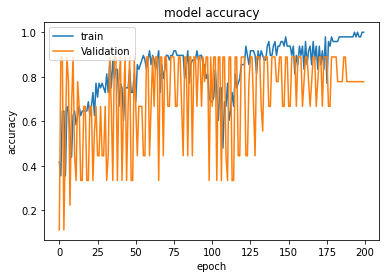

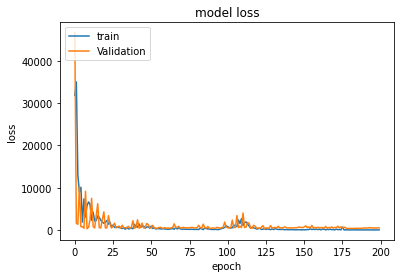

In [ ]:
plot_train_and_val(history)